## Willkommen!

# Ist Maschinelles Lernen "trivial"?

Florian Reichl<br>
backspace Bamberg

---

# Die MNIST-Datenbank

## Das `HelloWorld` des maschinellen Lernens

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png"><br>
<a href="https://commons.wikimedia.org/wiki/File:MnistExamples.png">Josef Steppan</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

---


Unser Ziel ist einfach nur aus dem Bild einer handgeschriebenen Ziffer den Zahlwert der Ziffer zu erkennen.

Wir machen also aus ein paar Pixeln eine Zahl, mit der man zum Beispiel rechnen kann oder die man verwendet um eine Postleitzahl zu erkennen.

Wenn man für diese Aufgabe ein "klassisches" Programm schreiben möchte, so ist das eine durchaus ziemlich anspruchsvolle Aufgabe.

Wenn man es aber nicht klassisch programmiert, sondern maschinelles Lernen verwendet, wird es sehr viel einfacher:

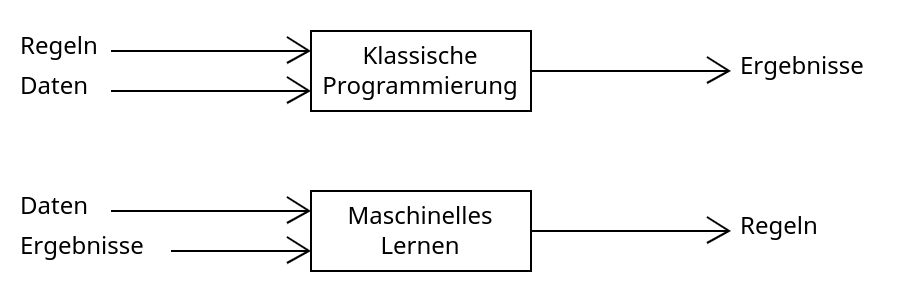

## Wie macht man aus einem Bild eine Zahl?
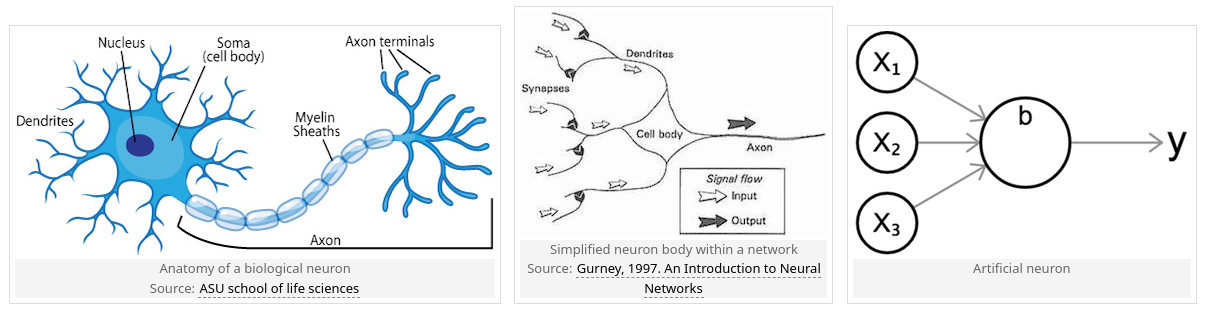
Quelle: https://ml4a.github.io/ml4a/neural_networks/

Es gibt also diese "Neuronen".

Die Neuronen eines neuronalen Netzes in einem Computer enthalten tatsächlich nur Zahlenwerte. Häufig sind das Kommazahlen zwischen 0 und 1, aber es können auch andere Zahlen sein.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('aircAruvnKk', start=195, end=235, width=1280, height=720)

# Lasst uns (in Python) programmieren…

Zuerst importieren wir die benötigten Bibliotheken:

In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

Dann holen wir uns die Daten:

(Wir haben Glück, die MNIST-Daten sind sogar in der Bibliothek enthalten. Man kann mit Python und den Bibliotheken aber auch recht einfach Daten aus CSV-Dateien oder aus dem Web einlesen.)

In [3]:
(x_training_df, y_training), (x_test_df, y_test) = tf.keras.datasets.mnist.load_data()

Hinweis: Mit `x` beschreiben wir die Eingabewerte, mit `y` die Ergebnisse. Mit oben stehendem Code werden ganze "Arrays" (eigentlich: "Tensoren") eingelesen.

$y=f(x)$

In unserem Beispiel enthält `x` die Helligkeitswerte der Pixel und `y` die zugehörigen Ziffernwerte.

Trainingsdaten sind Daten, an denen das neuronale Netz lernt.

Testdaten sind Daten, mit denen wir überprüfen, wie gut das Netz gelernt hat.



In [4]:
x_training = x_training_df.reshape(-1,28*28) / 255.0
x_test = x_test_df.reshape(-1,28*28) / 255.0

Damit wandeln wir die Daten in ein zweidimensionales Array um. Jede Zeile enthält alle Pixel eines Bildes.

Gleichzeitig werden die Helligkeitswerte von 0 bis 255 werden auf Kommazahlen zwischen 0 und 1 umgerechnet.

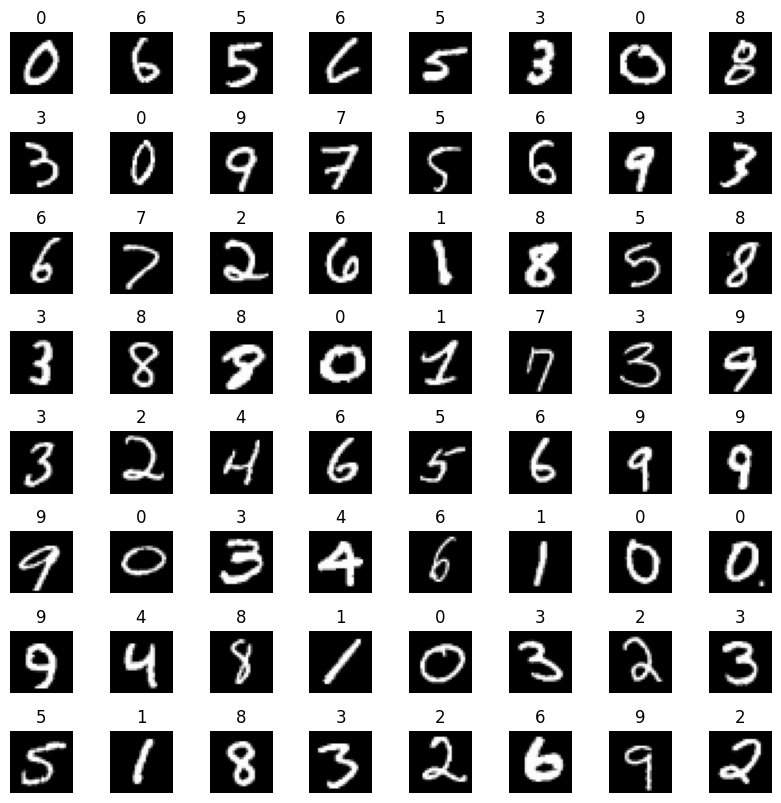

In [5]:
m, n = x_training.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_training[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_training[random_index])
    ax.set_axis_off()

## Jetzt bauen wir das Netz…

Erstmal weitere Bibliotheken laden:

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Jetzt bauen wir das Modell auf:

In [8]:
modell = Sequential()
modell.add(Dense(16,input_dim=784,activation='relu'))
modell.add(Dense(16))
modell.add(Dense(10, activation="softmax"))
modell.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

Nochmal schauen, was wir da gebaut haben:

In [9]:
modell.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


Und ab ins Training:

In [10]:
history = modell.fit(x_training, y_training, epochs=15, shuffle=True,validation_data=(x_test,y_test))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3993 - val_loss: 0.2444
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2216 - val_loss: 0.1998
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1936 - val_loss: 0.1836
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1779 - val_loss: 0.1786
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1680 - val_loss: 0.1794
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1590 - val_loss: 0.1726
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1514 - val_loss: 0.1760
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1455 - val_loss: 0.1731
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1401 - val_loss: 0.1658
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.135

Schauen wir uns ein paar Ergebnisse an.

Hinweis: Die Beschriftung ist `Label = Wert laut neuronalem Netz`

1/1 [==============================] - 0s 16ms/step


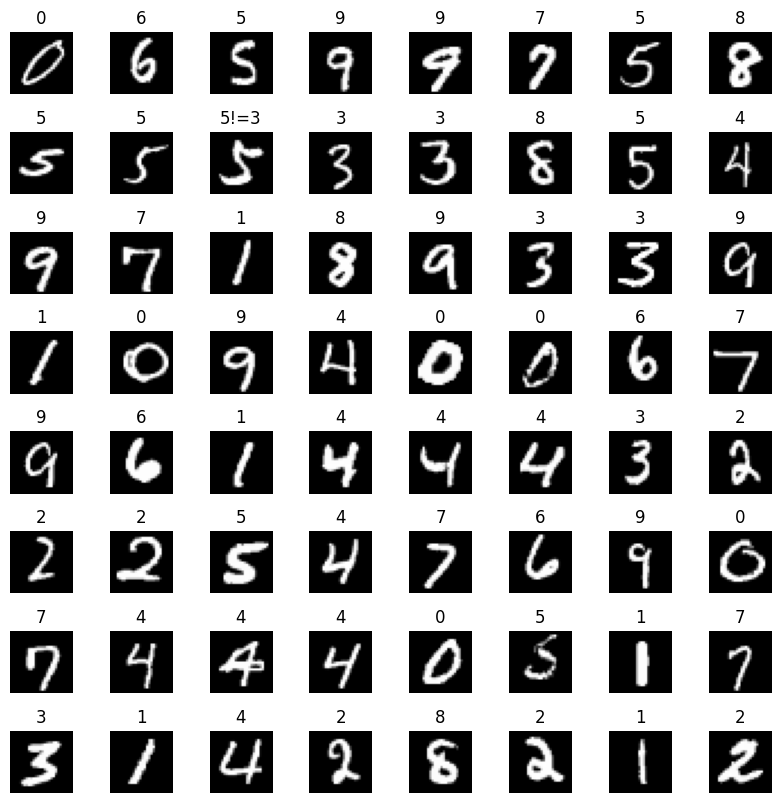

In [14]:
m, n = x_test.shape
y = 0

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test[random_index].reshape((28,28))
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    soll = y_test[random_index]
    ist = np.argmax(modell.predict(x_test[random_index].reshape(-1,784)))
    if (soll==ist):
        ax.set_title(str(ist))
    else:
        ax.set_title(str(soll) + '!=' + str(ist))
    ax.set_axis_off()

# Kurze Zusammenfassung

* Wir laden die Daten

* Wir bringen die Daten in Form

* Wir stellen die Daten grafisch dar (Veranschaulichung und Qualitätssicherung)

* Wir bauen das Netz:

        modell = Sequential()
        modell.add(Dense(16, input_dim=784, activation='relu'))
        modell.add(Dense(16))
        modell.add(Dense(10, activation="softmax"))
        modell.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

* Wir trainieren das Netz

        modell.fit(x_training, y_training, epochs=15, shuffle=True, validation_data=(x_test,y_test))

* Wir nutzen das Netz

        np.argmax(modell.predict(x_test[random_index].reshape(-1,784)))

## Welches "Expertenwissen" ist nötig?

* Die Zahl der Input-Neuronen ist gleich der Zahl der Messwerte (in unserem Fall der Zahl der Pixel)

* Die Zahl der Neuronen in den Hidden Layern (zwischen Input und Output) ist Erfahrungssache. Ich kenne keine Theorie, nach der wir diese festlegen sollten. Einfach ausprobieren.

* Die Zahl der Output-Neuronen ist gleich der Zahl der verschiedenen Ergebnisse, die möglich sind.

* Die `activation`-Funktionen sind typische für diese Klasse von Problemen. Genauso die `loss`-Funktion. Der `optimizer` funktioniert sowieso meistens.

* Beim Trainieren müssen wir beachten, dass es nicht zu einem Overfitting kommt.

* Das Ergebnis von `modell.predict` ist ein Array von Wahrscheinlichkeiten, von dem wir uns die größte Wahrscheinlichkeit herauspicken.

Solche Dinge sind relativ schnell erlernbar.

# Beispiel Shrink-Wrapper

<img src="https://www.se.com/us/en/assets/739/media/41499/1200/Parceling-IC-900x500.jpg">

Eigenschaften:

* Die Messer verschleißen und müssen deshalb immer wieder getauscht werden.

* Wir wollen nicht öfter tauschen als unbedingt nötig.

* Wir wollen aber auch nicht von einem kaputten Messer überrascht werden.

Ziel:

* Predictive Maintenance

* Aus Messwerten soll der Verschleiß der Messer mit Hilfe des ML-Systems geschätzt werden.

Messwerte:

<img src="https://www.kaggleusercontent.com/kf/40172948/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..NBodKdFyhvOMFdxMRcAc3w.UtvReQW7XEds3f1Ei8kDUywZY9NUHBXnlLJ-HqmBL6ihQy7EczsSJXsnlfjvyvjwu18ZWZKUWnXVvD52jbnehCMNF5AOaCswaldq-f6ch-vKlnauiA33BPiRPxkqFzazk5ZoDDEC_8iIMDYIkqCnI1e_su9DE-s3jZL5yQXXzuaYWcZpFoJErmM49CNsne0FIqhU8bpqdRNalqiy9PUixArAeuNLaH5sR0EuQAVRG24_5ndJ--T84iWAANsuqja7_rv7od-Szcz4du1U1iImFJC4tcz2bXUbOoT77pcOVFJTx6j50QX-tJHykXEtaW63_2OYjEG8fJNmM4WqctkpqkBuxjZGpyrnVq7lXWZdTQL5fgakaQuUx7H9qXJRrdIMDo_X1T6oR6AxGESzgzrCocw-CZFcpnUIsWeKhdL7jpVHu8dSWBfZtlmcCVQeEbRj4D9K9v1Rir7XVxfu-BMYAGYa5Dt0sUrEgysNGvHThAUS21qBf8HeRu-9QNer-3I6DXiW7TxyoEDXAOEfEgOeIDJjQ8B82BzBN18ek9xVBgVETw0YPkEOkQPgQKKbsA0xvWw0oezW95RK7KqKbTFaYOh2DtbtV_awGYIS4o1UpWp0Ulg-yLRr-7jHNmfwRwZYtd5oE59WvjgGn7cWiSshIhrpcsX-9aIz_UPfTEfpHfyJiFiENAS5jZcKCBGLOP5g.DILjUV54l8xBYY-G_cGZkg/__results___files/figure-html/unnamed-chunk-10-1.png">

<a href="https://www.kaggle.com/code/anshumoudgil/iiot-or-industry-4-0-shrink-wrapper-concept">Quelle</a>

## Erfahrungen

* Einfach nur Messwerte in das neuronale Netz zu kippen führt zu keinen guten Ergebnissen.

* Bessere Ergebnisse findet man, wenn man Maxima und Minima in der Kurve sucht.

    * Diese absoluten Messwerte (Höhe von Maxima und Minima) kann man in das Netz füttern.
    
    * Man kann den zeitlichen Abstand von einem Maximum zum nächsten bestimmen.
    
    * Man kann die Kurve normieren, so dass von einem Maximum zum nächsten immer die gleiche Zahl an (interpolierten) Messwerten in das Netz gefüttert wird.
    
    * … vielleicht gibt es noch mehr Ideen.
    
All diese Schritte sind klassisches Programmierhandwerk.

# Fazit

## Es gibt viele Dinge, die es wert wären, in einem neuronalen Netz ausgewertet zu werden

* Predictive Maintenance

* Wird der/die Kund\*in seine Rechnung bezahlen oder verlangen wir lieber Vorkasse?

* Abhängig vom Wetterbericht und vom Wochentag: Wie viel Brötchen soll der Becker backen?

* Ich habe viele Schüler\*innen, die mit dem Auto in die Schule kommen: Wie lange können sie schlafen, in Abhängigkeit von Wochentag und Wetter, und trotzdem um Punkt 8 Uhr im Klassenzimmer sein?

* Wie viel Mate benötigt ein Hackertreffen in Abhängigkeit von …

## Wir brauchen aufbereitete Daten

* Sammeln von Daten und

* Aufbereiten von Daten mit klassischem Programmierhandwerk sind wichtig.

## Die Nutzung von maschinellem Lernen ist gar nicht so schwierig.

* Bibliotheken wie Keras und TensorFlow ermöglichen einen einfachen Einstieg.

## Erfahrungen sind Gold wert

* Also lasst uns anfangen. Nur so können wir Erfahrungen sammeln.